# Exercise 1
 <p><div class="lev1"><a href="#Task-A.-Another-LEGO-brick-in-the-wall"><span class="toc-item-num">Task A.&nbsp;&nbsp;</span>Another LEGO brick in the wall</a></div>
 <p><div class="lev1"><a href="#Task-B.-Drop-the-Bike"><span class="toc-item-num">Task B.&nbsp;&nbsp;</span>Drop the Bike</a></div>

In [74]:
%matplotlib inline
import pandas as pd
import numpy as np
import re 

In [75]:
DATA_FOLDER = r'data'

## Task A. Another LEGO brick in the wall

LEGO is a popular brand of toy building bricks. They are often sold in sets in order to build a specific object. Each set contains a number of parts in different shapes, sizes and colors. This database contains information on which parts are included in different LEGO sets. It was originally compiled to help people who owned some LEGO sets already figure out what other sets they could build with the pieces they had.

This dataset contains the official LEGO colors, parts, inventories (i.e., sets of LEGO parts which assembled create an object in the LEGO world) and sets (i.e., sets of LEGO inventories which assembled create a LEGO ecosystem). The schema of the dataset can be shown in the following UML diagram: 

![lego-schema](lego-schema.png)

In this task you have to apply the following Data Wrangling pipeline:
1. Load your data into `Pandas`
* Explore it and clean its dirty parts
* Use it to answer a set of queries

Each of these subtasks are described in detail below.

### A1. Loading phase
Load all the csv files into different `DataFrames`. Use meaningful names for your `DataFrames` (e.g., the respective filenames).

*Hint: You can load files without first unzipping them (for `Pandas` version >= 0.18.1).*

In [76]:
LEGO_DATA_FOLDER = DATA_FOLDER + '/lego'

In [77]:
#Data declarations
sets = pd.read_csv(LEGO_DATA_FOLDER + "/sets.csv.zip")
colors = pd.read_csv(LEGO_DATA_FOLDER + "/colors.csv.zip")
inventories = pd.read_csv(LEGO_DATA_FOLDER + "/inventories.csv.zip")
inventory_parts = pd.read_csv(LEGO_DATA_FOLDER + "/inventory_parts.csv.zip")
inventory_sets = pd.read_csv(LEGO_DATA_FOLDER + "/inventory_sets.csv.zip")
part_categories = pd.read_csv(LEGO_DATA_FOLDER + "/part_categories.csv.zip")
parts = pd.read_csv(LEGO_DATA_FOLDER + "/parts.csv.zip")
themes = pd.read_csv(LEGO_DATA_FOLDER + "/themes.csv.zip")

### A2. Cleaning phase
Explore the following columns from your dataset:

1. sets: year
* inventory_parts: quantity

What is the time range of the sets? 
What is the average quantity of the inventory parts? 
Do you see any inconsistencies? 
Provide code that detects and cleans such inconsistencies and validates the coherence of your dataset. 

## 1. sets: year
Explore the following column from your dataset and determine time range of the sets

In [78]:
#print first few rows of year column
sets.year.head()

0     70s
1    1978
2    1987
3    1979
4    1979
Name: year, dtype: object

In [79]:
#identify unique year values
print(sets.year.unique())

['70s' '1978' '1987' '1979' '19788' '1976' '1965' '1985' '1968' '1999'
 '1967' '1969' '2001' '20011' '1966' '2003' '2002' '20022' '-2003' '20033'
 '-2002' '20044' '2004' '2006' '20055' '2005' '-2004' '-2006' '-2010'
 '-2005' '20066' '2007' '20077' '2008' '20088' '-2009' '2009' '20099'
 '2010' '20100' '-2011' '2011' '20111' '2012' '20122' '-2013' '2013'
 '20133' '20144' '-20144' '2015' '2014' '-2014' '20155' '-2015' '2016'
 '20166' '-2016' '2017' '1977' '1983' '1986' '1984' '1973' '-2012'
 '-20155' '1981' '-2000' '80s' '1982' '1988' '20177' '-2017' '-1999'
 '19999' '-1986' '1997' '1998' '1971' '-1966' '-1977' '-1981' '-1985'
 '20000' '2000' '-20000' '1955' '1956' '1957' '-1982' '-1969' '19822'
 '19555' '1958' '-2001' '1974' '1972' '19988' '-1998' '19877' '19855'
 '19777' '1975' '-1987' '-1979' '1992' '1991' '-1991' '1989' '1990' '1993'
 '-1992' '-1989' '1994' '19944' '-1994' '1996' '19899' '19900' '19922'
 '1995' '-1995' '19966' '-1997' '19722' '19955' '19933' '1959' '1962'
 '-2008' '-2

<p>As we see, there are some invalid year entries in sets dataset. For example, there are some negative years and 5 digit years. As well as entries like 70s and 80s instead of numbers</p>

In [80]:
#replacing 70s and 80s to 1970 and 1980
sets.replace(to_replace='70s',value='1970', inplace=True)
sets.replace(to_replace='80s',value='1980',inplace=True)
#setting type as integer
sets.year = sets.year.astype(int)

Above we replaced 70s and 80s with 1970 and 1980. Since we did not know exact year another option would have been to take 1975 and 1985 accordingly. After replacement there are only integer types left in dataset, so we set year attribute type as integer.
<p>Since years have integer type, we can now take abolute values (because negative years don't exist so we will take absolute values of each negative year)</p>

In [81]:
#taking absolute value
sets.year = sets.year.abs()
#displayin new unique year set
sets.year.unique()

array([ 1970,  1978,  1987,  1979, 19788,  1976,  1965,  1985,  1968,
        1999,  1967,  1969,  2001, 20011,  1966,  2003,  2002, 20022,
       20033, 20044,  2004,  2006, 20055,  2005,  2010, 20066,  2007,
       20077,  2008, 20088,  2009, 20099, 20100,  2011, 20111,  2012,
       20122,  2013, 20133, 20144,  2015,  2014, 20155,  2016, 20166,
        2017,  1977,  1983,  1986,  1984,  1973,  1981,  2000,  1980,
        1982,  1988, 20177, 19999,  1997,  1998,  1971, 20000,  1955,
        1956,  1957, 19822, 19555,  1958,  1974,  1972, 19988, 19877,
       19855, 19777,  1975,  1992,  1991,  1989,  1990,  1993,  1994,
       19944,  1996, 19899, 19900, 19922,  1995, 19966, 19722, 19955,
       19933,  1959,  1962,  1961, 19977,  1960,  1963,  1964, 19666,
       19799, 19911, 19622, 19844, 19866, 19888,  1950,  1953,  1954,
       19811, 19800, 19833, 19699], dtype=int64)

<p>Year values look good now, except for some years that contain 5 digits. We assume that fifth digit in some of the years is typo, repetition of last digit. That's why we will remove last digit of every 5-digit year.</p>

In [82]:
#deleting last digit of 5 digit years
sets.loc[sets['year'].astype(str).str.len() == 5, 'year'] /= 10
sets.year = sets.year.astype(int)

#displayin new unique year set
sets.year.unique()

array([1970, 1978, 1987, 1979, 1976, 1965, 1985, 1968, 1999, 1967, 1969,
       2001, 1966, 2003, 2002, 2004, 2006, 2005, 2010, 2007, 2008, 2009,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 1977, 1983, 1986, 1984,
       1973, 1981, 2000, 1980, 1982, 1988, 1997, 1998, 1971, 1955, 1956,
       1957, 1958, 1974, 1972, 1975, 1992, 1991, 1989, 1990, 1993, 1994,
       1996, 1995, 1959, 1962, 1961, 1960, 1963, 1964, 1950, 1953, 1954],
      dtype=int64)

In [83]:
#describe year attribute
sets.year.describe()

count    11673.000000
mean      2001.972758
std         13.475364
min       1950.000000
25%       1997.000000
50%       2005.000000
75%       2012.000000
max       2017.000000
Name: year, dtype: float64

As we see, year is now numerical and time range of sets is thus [1950, 2017]

<u><b><font color='green'>ANSWERS:</font></b></u><br><br>

As we see there were many invalid dates in the data set.
For instance, negative values, typos: '19955' instead of '1995', 70s or 80s instead of an actual year
Below are the steps we followed for transformations:

* Replacing "70s" and "80s" by "1970" and "1980" 
* Taking absolute values 
* Removing last digit of 5 digit numbers (example: 19955//10 -> 1995)

## 2. inventory_parts: quantity
Explore the following column from your dataset. What is the average quantity of the inventory parts? Do you see any inconsistencies? Provide code that detects and cleans such inconsistencies and validates the coherence of your dataset.

In [84]:
#calculate average quantity of inventory parts
inventory_parts.quantity.mean() 

-inf

As we see, answer is -inf. This means, that there are some inconsistencies in data since some values are probably invalid. (-inf)

In [85]:
#count number of - infinity quantity values in inventories
print(
    "count number of - infinity quantity values in inventories:", inventory_parts[inventory_parts.quantity == -np.inf].shape[0])

count number of - infinity quantity values in inventories: 161796


In [86]:
#check if there are zeros in dataset
print("number of entries with zero quantities:", inventory_parts[inventory_parts.quantity == 0].shape[0])

number of entries with zero quantities: 0


Since there are no 0 entries in the database for any inventory_parts, we will assume that -inf was generated by default when leaving some fields blank. However, having an entry with zero quantity is of no use, that's why we are removing them.

In [87]:
#Cleaned inventory parts
inventory_parts = inventory_parts[inventory_parts.quantity >= 0] 
inventory_parts.head(5)

,inventory_id,part_id,color_id,quantity,is_spare
0,1,48379c01,72,1.0,f
1,1,48395,7,1.0,f
2,1,mcsport6,25,1.0,f
3,1,paddle,0,1.0,f
4,3,11816pr0005,78,1.0,f


In [88]:
#describe quantity
inventory_parts.quantity.describe()

count    418455.000000
mean          3.836938
std           9.642451
min           1.000000
25%           1.000000
50%           1.000000
75%           4.000000
max        1440.000000
Name: quantity, dtype: float64

Quantity Attribute seems to have expected values now, with minimum of 1 and maximum of 1440. Thus, our dataset is coherent

### A3. Querying phase
Answer the following queries using the functionality of `Pandas`:

1. List the ids of the inventories that belong to sets that contain cars. (*Hint: Find a smart way to distinguish which sets contain cars based on the sets' name*).
* Plot the distribution of part categories as a (horizontal) bar chart. Restrict yourself to the 20 largest part categories (in terms of the number of parts belonging to the category).
* Find the dominant color of each set. Then, plot using a (horizontal) bar chart, the number of sets per dominant color. Color each bar with the respective color that it represents.
* Create a scatter plot of the *luminance*\* of the sets vs their publishing year. What do you observe for the years 1980-1981? How do you interpret what you see?

\*The luminance of a color is a [measure of brightness](https://en.wikipedia.org/wiki/Luminance) which, given its RGB representation, can be computed as follows:

$luminance = \sqrt{0.299*R^2 + 0.587*G^2 + 0.114*B^2}$

#    A3 . 1    #
List the ids of the inventories that belong to sets that contain cars. (Hint: Find a smart way to distinguish which sets contain cars based on the sets' name)

In [141]:

#Search for sub string
a = sets.name.str.contains(' CARS ', flags=re.IGNORECASE, regex=True) 
b = sets.name.str.contains(' CAR ', flags=re.IGNORECASE, regex=True) 
c = sets.name.str.contains('CAR ', flags=re.IGNORECASE, regex=True)
d = sets.name.str.endswith('car') 

#Get only sets with corresponding string in name
car_sets_a = sets[a.values]
car_sets_b = sets[b.values]
car_sets_c = sets[c.values]
car_sets_d = sets[d.values]


car  = car_sets_a.append(car_sets_b)
car = car.append(car_sets_c)
car = car.append(car_sets_d)
#We ignore sets  recurrency because they will be in the same inventory

#locate inventories id
car_part = inventory_sets.loc[inventory_sets.set_id.isin(car.id)]
car.head()

,id,name,year,theme_id,num_parts
50,10022-1,"Santa Fe Cars - Set II (dining, observation, o...",2002,237,410
53,10025-1,Santa Fe Cars - Set I (mail or baggage car),2002,237,325
3515,4117-1,Fantastic Flyers & Cool Cars Bucket,2001,37,266
6545,66392-1,"Duplo Cars Super Pack 3 in 1 (5816, 5817, 5818)",2012,506,-1
182,10200-1,Custom Car Garage,2008,397,893


<u><b><font color='green'>ANSWERS:</font></b></u><br><br>

In order to find sets that contains cars, we use regular expression to find the string 'car(s)' in the name of the sets.
The main issue with that method is that we ignore some sets that have cars because the string we look for is not contained in their name. For example sponsored sets like the set 'Bugatti' or the set 'michael schumacher' .
We had to make sure that we don't select sets with the substring 'car' embeded in an other string that has nothing to do with cars. For example 'carrouselle'.


#    A3 . 2    #
Plot the distribution of part categories as a (horizontal) bar chart. Restrict yourself to the 20 largest part categories (in terms of the number of parts belonging to the category).

First of all we calculate number of part in each category. To do so, we group parts dataset by part category and determine size of each group. We then select first 20 largest part categories

In [90]:
#grouping pars by parts_category and extracting 20 largest groups
Largest_number_part = parts.groupby('part_cat_id').size().nlargest(20)


parts.groupby('part_cat_id').part_cat_id.count()
#Shift the indices so the id match the index
aligned_part = part_categories.shift(periods=1, freq=None, axis=0)

#Create a series do get name of largest category
aligned_part['number'] = (parts.groupby('part_cat_id').part_cat_id.count())
biggest_category = aligned_part.sort_values('number',ascending=False).head(20)

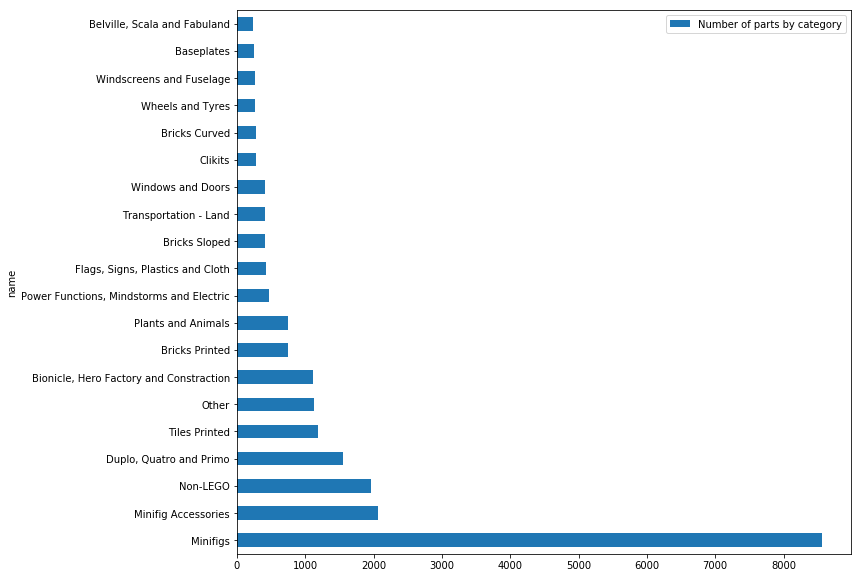

In [91]:
df = pd.DataFrame({"Number of parts by category": Largest_number_part.tolist()}
                 , index=biggest_category.name)
ax = df.plot.barh(figsize=(11, 10))


#    A3 . 3    #
Find the dominant color of each set. Then, plot using a (horizontal) bar chart, the number of sets per dominant color. Color each bar with the respective color that it represents.

First of all let's see if all sets have inventories:

In [92]:
#number of unique sets that have inventories
print("number of unique sets that have inventories:", inventory_sets.set_id.unique().shape[0])
#number of total sets
print("number of total sets:", sets.shape[0])

number of unique sets that have inventories: 2306
number of total sets: 11673


As we see, not all sets have inventories. 

As we need to find the relation between Sets and Colors, we have to join 4 differents dataframe.

We inner joined sets and inventory_sets to get the inventories_id corresponding to sets_id. Then we joined inventories sets and parts based on inventories_ids. Finally, we were able to catch the colors names and rgb code from colors dataframe.

In [93]:
#cast ids to string
sets.id = sets.id.astype(str)
inventory_sets.inventory_id = inventory_sets.inventory_id.astype(str)
inventory_parts.inventory_id = inventory_parts.inventory_id.astype(str)

#merging sets and inventory sets. Using right join to fetch only the existing id in inventory_sets
merge_sets_Inventory = pd.merge(sets, inventory_sets, how='outer',left_on=['id'], right_on=['set_id'])
merge_sets_Inventory_filtered = pd.DataFrame()
merge_sets_Inventory_filtered['set_id'] = merge_sets_Inventory.set_id
merge_sets_Inventory_filtered['inventory_id'] = merge_sets_Inventory.inventory_id
merge_sets_Inventory_filtered['quantity'] = merge_sets_Inventory.quantity

#removing where there is quantity < 1
set_inventory_quantity = merge_sets_Inventory_filtered[(merge_sets_Inventory_filtered['quantity'] > 0)]

#merging until colors dataframe
inventory_inventory = pd.merge(inventory_parts, set_inventory_quantity, how='right',on=['inventory_id'])
inventory_inventory = inventory_inventory.dropna()
inventory_color = pd.merge(inventory_inventory, colors, how='outer',left_on=['color_id'], right_on=['id'])
inventory_color_filtered = pd.DataFrame()
inventory_color_filtered['set_id'] = inventory_color.set_id
inventory_color_filtered['name'] = inventory_color.name
inventory_color_filtered['rgb'] = inventory_color.rgb
inventory_color_filtered['quantity_x'] = inventory_color.quantity_x
inventory_color_filtered['quantity_y'] = inventory_color.quantity_y

#Removing No Color and Unknown color from the dataframe
inventory_color_filtered = inventory_color_filtered[inventory_color_filtered['name'] != '[No Color]' ]

#grouping by set_ids and colors
groupby_sets = inventory_color_filtered.groupby(['set_id','name','rgb','quantity_x','quantity_y']).set_id.count()
groupby_sets.head()

set_id   name              rgb     quantity_x  quantity_y
10173-1  Black             05131D  1.0         1.0           1
                                   6.0         1.0           1
         Dark Bluish Gray  6C6E68  16.0        1.0           1
1062-1   Black             05131D  6.0         1.0           2
         Green             237841  13.0        1.0           1
Name: set_id, dtype: int64



We considered that the dataset inventory_sets contains constructed objects than will be present in the set, so we multiply by the quantity of these objects for each sets.
We considered that inventory_parts contains all the elementary parts for each built object. So we multiply by the quantity of these elementary parts for each object.
By merging with colors dataset we finally have the color of all the individual elementary parts that are in each set.

In [94]:
#keeping only the color the most used per set
groupby_sets = inventory_color_filtered.groupby(['set_id','name','rgb','quantity_x','quantity_y']).set_id.count().reset_index(name="count")
#counting the number of color apparition
groupby_sets=groupby_sets.groupby(['name','rgb','quantity_x','quantity_y']).agg({'count':'sum'})
#getting dataframe to display it
df = pd.DataFrame.from_dict(groupby_sets)
#reseting index to access column by name
df.reset_index(inplace=True)
#multiplying count by quantity
df.count = df['count'].astype(int)
df_quantity = df
df_quantity['quantity']=df_quantity.count * df_quantity.quantity_x * df_quantity.quantity_y
df = df_quantity

To display the graph we used the previous data "groupby_sets" that references all the color names, RGB codes and count of dominance.
We display the bar with the good colors thanks to the RGB code.

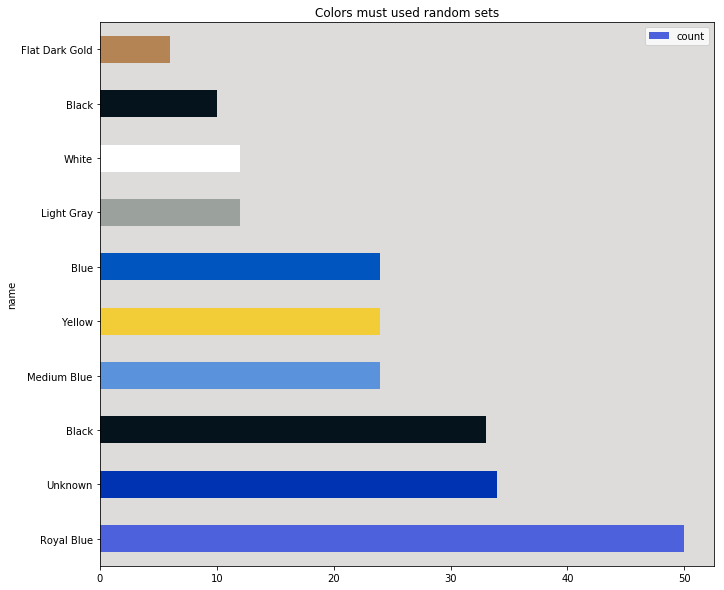

In [95]:
df = df.sort_values('count', ascending=False).head(20)
#adding '#' to convert the RGB code to legal RGB code for the plot
df['rgb'] = '#' + df['rgb'].astype(str)
#displaying horizontal bar graph
fig = df.head(10).plot(color=df['rgb'],x='name',y='count',kind='barh',title='Colors must used random sets', figsize=(11, 10))
#changing background color to see white bar
fig.patch.set_facecolor('#DEDBDB')


#    A3 . 4    #
Create a scatter plot of the luminance* of the sets vs their publishing year. What do you observe for the years 1980-1981? How do you interpret what you see?

In [96]:
#merge the dataframe above with corresponding rbg to the name of the color
color_sets = inventory_color_filtered

#Merge the dataframe above with sets, to get year for each set_id
color_set_rgb_year =  pd.merge(color_sets, sets, how='inner',left_on=['set_id'], right_on=['id'])

#extract and convert R, G and B from string to int from rgb of each set
color_set_rgb_year['R'] =  color_set_rgb_year.rgb.apply(lambda x:(int(x[0:2], 16) )) #R 
color_set_rgb_year['G'] =  color_set_rgb_year.rgb.apply(lambda x:(int(x[2:4], 16) )) #G
color_set_rgb_year['B'] =  color_set_rgb_year.rgb.apply(lambda x:(int(x[4:6], 16) )) #B

#Luminance
color_set_rgb_year['Lum'] =np.sqrt(0.299* color_set_rgb_year.R* color_set_rgb_year.R + 0.587*color_set_rgb_year.G*color_set_rgb_year.G + 0.114*color_set_rgb_year.B*color_set_rgb_year.B)

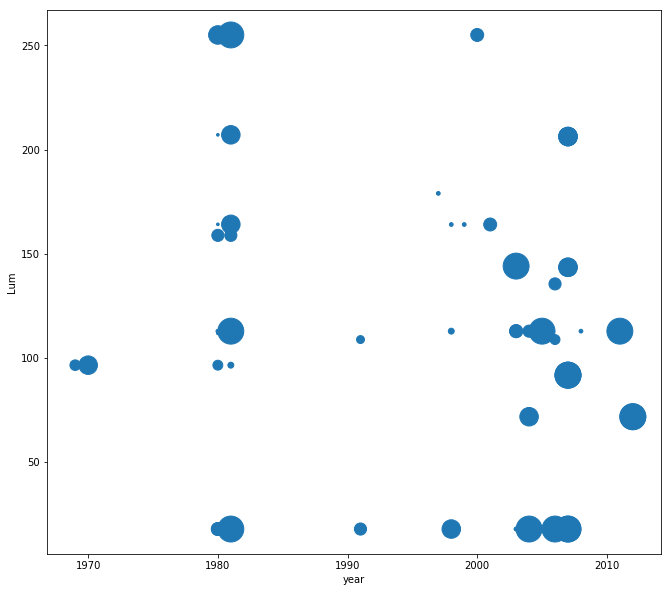

In [97]:
color_set_rgb_year.sort_values(['year'])
#Display scatter x = year , y = luminance, and the size is proportional to number of sets per year
color_set_rgb_year.plot.scatter('year', 'Lum' ,color_set_rgb_year.groupby('year').year.count()*7,figsize=(11, 10)) 


<u><b><font color='green'>ANSWER:</font></b></u><br><br>

The rgb column is a string that contain the color value encoded as hexadecimal on 8 bytes for each red, green and blue.
We extract substring that represent R, G and B from the string rgb. We convert it as int from a hex.
To have a size proportional to the number of set in the same year with the same luminance in the scatter plot,  we just group sets by year and count them. 
There are not as much data from 1970 to 1995 as there are from 1995 to 2012, maybe because the lego company was smaller or maybe because data were lost before the numerization.
In 1980, the number of sets registered in the data is much higher than the average.And the luminance of the sets is quiet nicely distributed.


## Task B. Drop the bike

*Los Angeles Metro* has been sharing publicly [anonymized *Metro Bike Share* trip data](https://bikeshare.metro.net/about/data/) under the [Open Database License (ODbL)](http://opendatacommons.org/licenses/odbl/1.0/).

In this task you will again perform data wrangling and interpretation.

### B1. Loading phase
Load the json file into a `DataFrame`.


In [98]:
BIKES_DATA_FOLDER = DATA_FOLDER + '/bikes'

In [99]:
#read json zip file into data frame
bike_share_trip = pd.read_json(BIKES_DATA_FOLDER + "/metro-bike-share-trip-data.json.zip")
#bike_share_trip = df_metroBike.sort_values('Bike ID')
bike_share_trip.head()

,Bike ID,Duration,End Time,Ending Station ID,Ending Station Latitude,Ending Station Longitude,Passholder Type,Plan Duration,Start Time,Starting Station ID,Starting Station Latitude,Starting Station Longitude,Trip ID,Trip Route Category
0,6281.0,180,2016-07-07T04:20:00,3014.0,34.056610,-118.23721,Monthly Pass,30.0,2016-07-07T04:17:00,3014.0,34.056610,-118.23721,1912818,Round Trip
1,6281.0,1980,2016-07-07T06:33:00,3014.0,34.056610,-118.23721,Monthly Pass,30.0,2016-07-07T06:00:00,3014.0,34.056610,-118.23721,1919661,Round Trip
2,5861.0,300,2016-07-07T10:37:00,3016.0,34.052898,-118.24156,Flex Pass,365.0,2016-07-07T10:32:00,3016.0,34.052898,-118.24156,1933383,Round Trip
3,5861.0,10860,2016-07-07T13:38:00,3016.0,34.052898,-118.24156,Flex Pass,365.0,2016-07-07T10:37:00,3016.0,34.052898,-118.24156,1944197,Round Trip
4,6674.0,420,2016-07-07T12:58:00,3032.0,34.049889,-118.25588,Walk-up,0.0,2016-07-07T12:51:00,3032.0,34.049889,-118.25588,1940317,Round Trip


### B2. Cleaning phase
Describe the type and the value range of each attribute. Indicate and transform the attributes that are `Categorical`. Are there redundant columns in the dataset (i.e., are there columns whose value depends only on the value of another column)? What are the possible pitfalls of having such columns? Reduce *data redundancy* by extracting such columns to separate `DataFrames`. Which of the two formats (the initial one or the one with reduced data redundancy) is more susceptible to inconsistencies? At the end print for each `Dataframe` the *type of each column* and it's *shape*.

In [100]:
#describing types of attributes
bike_share_trip.dtypes

Bike ID                       float64
Duration                        int64
End Time                       object
Ending Station ID             float64
Ending Station Latitude       float64
Ending Station Longitude      float64
Passholder Type                object
Plan Duration                 float64
Start Time                     object
Starting Station ID           float64
Starting Station Latitude     float64
Starting Station Longitude    float64
Trip ID                         int64
Trip Route Category            object
dtype: object

In [101]:
#describing attributes
bike_share_trip.describe()

,Bike ID,Duration,Ending Station ID,Ending Station Latitude,Ending Station Longitude,Plan Duration,Starting Station ID,Starting Station Latitude,Starting Station Longitude,Trip ID
count,132417.000000,132427.000000,132331.00000,131376.000000,131376.000000,131661.000000,132408.000000,132379.000000,132379.000000,1.324270e+05
mean,6193.618878,1555.301562,3042.38672,34.034614,-118.206642,44.821967,3043.020754,34.039309,-118.221534,1.153001e+07
std,293.606755,5814.241813,43.08440,0.650706,2.259913,90.411579,37.742021,0.529336,1.838335,6.369462e+06
min,1349.000000,60.000000,3000.00000,0.000000,-118.472832,0.000000,3000.000000,0.000000,-118.472832,1.912818e+06
25%,5953.000000,360.000000,3022.00000,34.044159,-118.256981,0.000000,3024.000000,34.044170,-118.256980,5.060814e+06
50%,6186.000000,600.000000,3038.00000,34.046810,-118.250954,30.000000,3040.000000,34.046822,-118.250954,1.043827e+07
75%,6434.000000,1080.000000,3063.00000,34.050480,-118.238810,30.000000,3063.000000,34.050880,-118.241562,1.720633e+07
max,6728.000000,86400.000000,4108.00000,34.064281,0.000000,365.000000,4108.000000,34.064281,0.000000,2.379422e+07


Above we have value range and other descriptions of some attributes. However, object type attributes are not regarded in that data frame. Let's study them separately.
End Time and Start Time are clearly date objects and should be handled accordingly:

In [102]:
#description of passholder type
print("Description of passholder type")
print(bike_share_trip['Passholder Type'].describe(), '\n')
#unique values of passholder type
print("Values of passholher type")
print(bike_share_trip['Passholder Type'].unique())

Description of passholder type
count           132427
unique               4
top       Monthly Pass
freq             81304
Name: Passholder Type, dtype: object 

Values of passholher type
['Monthly Pass' 'Flex Pass' 'Walk-up' 'Staff Annual']


In [103]:
#description of Trip Route Category
print("Description of trip route category")
print(bike_share_trip['Trip Route Category'].describe(), '\n')
#unique values of Trip Route Category
print("Values of trip route category")
print(bike_share_trip['Trip Route Category'].unique())

Description of trip route category
count      132427
unique          2
top       One Way
freq       119642
Name: Trip Route Category, dtype: object 

Values of trip route category
['Round Trip' 'One Way']


In [104]:
bike_share_trip['Plan Duration'].unique()

array([ 30., 365.,   0.,  nan])

Therefore, in the dataset we have the following categorical variables:
<ul>
    <li>Passholder Type: 4 categories ['Monthly Pass' 'Flex Pass' 'Walk-up' 'Staff Annual']. Describes Pass type a person taken a trip had</li>
    <li>Plan Duration: 4 categories [0., 365., 30, nan] corresponds to passholder types ['Walk-up' 'Flex Pass' 'Monthly Pass'  'Staff Annual'] respectivly </li>
    <li>Trip Route Category: 2 categories ['Round Trip' 'One Way']</li>
</ul>

In [105]:
#setting categorical columns
categorical_cols = ['Passholder Type', 'Plan Duration', 'Trip Route Category']
categorical_cols

['Passholder Type', 'Plan Duration', 'Trip Route Category']

In [106]:
#Transforming indicated attributes as categorical 
bike_share_trip[categorical_cols] = bike_share_trip[categorical_cols].astype('category')

In [107]:
#attribute types
bike_share_trip.dtypes

Bike ID                        float64
Duration                         int64
End Time                        object
Ending Station ID              float64
Ending Station Latitude        float64
Ending Station Longitude       float64
Passholder Type               category
Plan Duration                 category
Start Time                      object
Starting Station ID            float64
Starting Station Latitude      float64
Starting Station Longitude     float64
Trip ID                          int64
Trip Route Category           category
dtype: object

As we can see, all the three above mentioned attributes are categorical now.

<u><b>Redundant columns:</b></u><br>

* Duration column is the total second between start time and end time<br>
* Plan duration is the number of days in the plan, it depends of the PassHolder Type
Monthly -> 30, Flex Pass -> 365<br>
* Trip Route Category depends on start and end station. If they are the same then trip route category is a round trip, otherwise it is one way trip

In [108]:
#Extracting redundant columns based on the analysis explained in Output[209]
redudant_columns = ['Duration','Plan Duration', 'Trip Route Category']
bike_share_trip_redundancy = bike_share_trip[redudant_columns]
bike_share_trip_redundancy.head(10)

,Duration,Plan Duration,Trip Route Category
0,180,30.0,Round Trip
1,1980,30.0,Round Trip
2,300,365.0,Round Trip
3,10860,365.0,Round Trip
4,420,0.0,Round Trip
5,780,30.0,One Way
6,600,30.0,One Way
7,600,365.0,One Way
8,2880,365.0,Round Trip
9,960,30.0,One Way


In [109]:
#Create dataframe without redundancy
bike_share_trip_withoutRedundancy = bike_share_trip
bike_share_trip_withoutRedundancy.drop(bike_share_trip_withoutRedundancy.columns[[1, 2]], axis=1, inplace=True)
bike_share_trip_withoutRedundancy.head(10)

,Bike ID,Ending Station ID,Ending Station Latitude,Ending Station Longitude,Passholder Type,Plan Duration,Start Time,Starting Station ID,Starting Station Latitude,Starting Station Longitude,Trip ID,Trip Route Category
0,6281.0,3014.0,34.056610,-118.23721,Monthly Pass,30.0,2016-07-07T04:17:00,3014.0,34.056610,-118.23721,1912818,Round Trip
1,6281.0,3014.0,34.056610,-118.23721,Monthly Pass,30.0,2016-07-07T06:00:00,3014.0,34.056610,-118.23721,1919661,Round Trip
2,5861.0,3016.0,34.052898,-118.24156,Flex Pass,365.0,2016-07-07T10:32:00,3016.0,34.052898,-118.24156,1933383,Round Trip
3,5861.0,3016.0,34.052898,-118.24156,Flex Pass,365.0,2016-07-07T10:37:00,3016.0,34.052898,-118.24156,1944197,Round Trip
4,6674.0,3032.0,34.049889,-118.25588,Walk-up,0.0,2016-07-07T12:51:00,3032.0,34.049889,-118.25588,1940317,Round Trip
5,6717.0,3054.0,34.039219,-118.23649,Monthly Pass,30.0,2016-07-07T12:51:00,3021.0,34.045609,-118.23703,1944075,One Way
6,5721.0,3014.0,34.056610,-118.23721,Monthly Pass,30.0,2016-07-07T12:54:00,3022.0,34.046070,-118.23309,1944073,One Way
7,5957.0,3005.0,34.048550,-118.25905,Flex Pass,365.0,2016-07-07T12:59:00,3076.0,34.040600,-118.25384,1944067,One Way
8,6137.0,3031.0,34.044701,-118.25244,Flex Pass,365.0,2016-07-07T13:01:00,3031.0,34.044701,-118.25244,1944062,Round Trip
9,6351.0,3078.0,34.064281,-118.23894,Monthly Pass,30.0,2016-07-07T13:01:00,3031.0,34.044701,-118.25244,1944063,One Way


In [110]:
#Displaying dataframe redundancy types
bike_share_trip_redundancy.dtypes

Duration                  int64
Plan Duration          category
Trip Route Category    category
dtype: object

In [111]:
#Displaying dataframe redundancy shape
bike_share_trip_redundancy.shape

(132427, 3)

In [112]:
#Displaying dataframe redundancy types
bike_share_trip_withoutRedundancy.dtypes

Bike ID                        float64
Ending Station ID              float64
Ending Station Latitude        float64
Ending Station Longitude       float64
Passholder Type               category
Plan Duration                 category
Start Time                      object
Starting Station ID            float64
Starting Station Latitude      float64
Starting Station Longitude     float64
Trip ID                          int64
Trip Route Category           category
dtype: object

In [113]:
#Displaying dataframe redundancy shape
bike_share_trip_withoutRedundancy.shape

(132427, 12)

<u><b><font color='green'>ANSWERS:</font></b></u><br><br>

<u><b>Redundant columns pitfalls:</b></u><br>

Having redundant columns is a poor design, since redundant values need to change when we update values it depends on. Otherwise we will have inconsistent data, that will not make logical sense. Since it is easy to miss updating depending variables, it might often cause problems. Therefore, table without redundancies are more suitable and is easier to maintain its consistency.

### B3. Querying Phase
Answer the following queries using the functionality of `Pandas`.

1. Plot the *distribution* of the number of outgoing trips from each station in a histogram with 20 bins (Hint: each bin describes a range of counts, not stations).
* Plot histograms for the *duration* and *trip starting hour in the day* attributes. For both the *duration*  and the *trip starting hour* use *discrete 1-hour intervals*. What do you observe in each plot? What are some popular values in the *duration* plot? Explain the local maxima and the trends you observe on the *trip starting hour* plot based on human behavior.
* For each *trip route category*, calculate the proportion of trips by *passholder type* and present your results in *a stacked bar chart with normalized height*.
* Considering only trips that begin in the morning hours (before noon), plot in *a single bar chart* the proportion of trips by *passholder type* and *trip route category*. Explain any outliers you observe.
* Separate the hours of the day into two intervals that have (approximately) the same number of bikes leaving the stations. For each of the two intervals calculate the proportion of trips by *passholder type* and *trip route category*. Present your results in a `DataFrame` which has a unique, non-composite index. Does the proportion of trips depend on whether it is the first or second hour interval? Would the company have any significant benefit by creating a more complex paying scheme where monthly pass users would pay less in the first interval and (equally) more on the second one? Assume that the number of trips per interval will not change if the scheme changes.

### B3. Querying Phase Solutions

<h3 align="center"> B3.1 </h3> 
Plot the distribution of the number of outgoing trips from each station in a histogram with 20 bins (Hint: each bin describes a range of counts, not stations).

In [114]:
#read bike share trip data into dataframe
bike_share_trip = pd.read_json(BIKES_DATA_FOLDER + "/metro-bike-share-trip-data.json.zip")
#display first few rows of data
bike_share_trip.head()

,Bike ID,Duration,End Time,Ending Station ID,Ending Station Latitude,Ending Station Longitude,Passholder Type,Plan Duration,Start Time,Starting Station ID,Starting Station Latitude,Starting Station Longitude,Trip ID,Trip Route Category
0,6281.0,180,2016-07-07T04:20:00,3014.0,34.056610,-118.23721,Monthly Pass,30.0,2016-07-07T04:17:00,3014.0,34.056610,-118.23721,1912818,Round Trip
1,6281.0,1980,2016-07-07T06:33:00,3014.0,34.056610,-118.23721,Monthly Pass,30.0,2016-07-07T06:00:00,3014.0,34.056610,-118.23721,1919661,Round Trip
2,5861.0,300,2016-07-07T10:37:00,3016.0,34.052898,-118.24156,Flex Pass,365.0,2016-07-07T10:32:00,3016.0,34.052898,-118.24156,1933383,Round Trip
3,5861.0,10860,2016-07-07T13:38:00,3016.0,34.052898,-118.24156,Flex Pass,365.0,2016-07-07T10:37:00,3016.0,34.052898,-118.24156,1944197,Round Trip
4,6674.0,420,2016-07-07T12:58:00,3032.0,34.049889,-118.25588,Walk-up,0.0,2016-07-07T12:51:00,3032.0,34.049889,-118.25588,1940317,Round Trip


In [115]:
#group trips data according to starting stations
bike_share_trip_grouped = bike_share_trip.groupby('Starting Station ID')
#determine number of outgoing trips for each group (station)
outgoing_trip_counts = bike_share_trip_grouped.size()

In [116]:
#description of number of outgoing trips
print("Outgoing Trip Counts according to some station:\n")
print(outgoing_trip_counts.head(), '\n')
print("Description:\n")
print(outgoing_trip_counts.describe())

Outgoing Trip Counts according to some station:

Starting Station ID
3000.0      29
3005.0    4883
3006.0    2708
3007.0    2785
3008.0    2156
dtype: int64 

Description:

count      67.000000
mean     1976.238806
std      1408.833679
min        13.000000
25%       833.500000
50%      1902.000000
75%      2977.000000
max      5138.000000
dtype: float64


Text(0.5,1,'Distribution of the Number of Outgoing Trips')

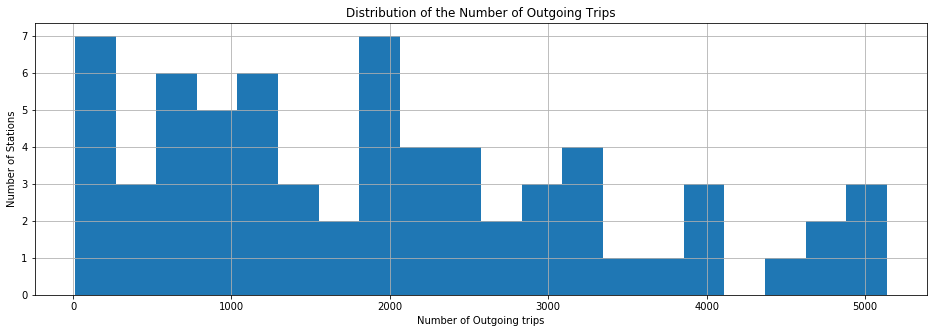

In [117]:
#create histogram of outgoing trips
outgoing_trips_hist = bike_share_trip_grouped.size().plot(kind='hist', bins=20, grid=True, figsize=(16,5))
outgoing_trips_hist.set_xlabel("Number of Outgoing trips")
outgoing_trips_hist.set_ylabel("Number of Stations")
outgoing_trips_hist.set_title("Distribution of the Number of Outgoing Trips")

In order to Plot the distribution of the number of outgoing trips from each station in a histogram we first group trip data according to ids of starting stations. Afterwards, we computer number of trips for each group (station) and plot distribution. Histogram shows outgoing trips distribution with 20 bins, where number of outgoing trips varies from 13 to 5138 with corresponding number of stations for each bin.
    

<h3 align="center"> B3.2 </h3> 
Plot histograms for the duration and trip starting hour in the day attributes. For both the duration and the trip starting hour use discrete 1-hour intervals. What do you observe in each plot? What are some popular values in the duration plot? Explain the local maxima and the trends you observe on the trip starting hour plot based on human behavior

Before starting exercise let's observe that Start time and End time are both dates, so it would makes sense to convert them accordingly:

In [118]:
#converting Start Time and End Time attributes to datetime
bike_share_trip['Start Time'] = pd.to_datetime(bike_share_trip['Start Time'])
bike_share_trip['End Time'] = pd.to_datetime(bike_share_trip['End Time'])

In [119]:
#listing types of attributes
bike_share_trip.dtypes

Bike ID                              float64
Duration                               int64
End Time                      datetime64[ns]
Ending Station ID                    float64
Ending Station Latitude              float64
Ending Station Longitude             float64
Passholder Type                       object
Plan Duration                        float64
Start Time                    datetime64[ns]
Starting Station ID                  float64
Starting Station Latitude            float64
Starting Station Longitude           float64
Trip ID                                int64
Trip Route Category                   object
dtype: object

As we see in the cell above, end time and start time represent dates now.

In [120]:
#extracting trip start times
start_time = bike_share_trip['Start Time']
#computing trips starting decimal hour
trip_starting_hour = (start_time.dt.hour * 3600.0 + start_time.dt.minute * 60 + start_time.dt.second) / 3600

 Calculating hours according to Start time as a decimal value
 <ol type="I">
    <li><p>Number of seconds since the start of the day: seconds = hour &ast; 3600.0 + minute &ast; 60 + second </p></li>
    <li>Hours as decimal number: seconds / 3600  </li>       
 </ol>

<b>a)<b> Plot histogram for the duration attribute using descrete 1-hour intervals. What do you observer in the plot? What are some popular values?

In [121]:
#describe duration attribute
bike_share_trip.Duration.describe()

count    132427.000000
mean       1555.301562
std        5814.241813
min          60.000000
25%         360.000000
50%         600.000000
75%        1080.000000
max       86400.000000
Name: Duration, dtype: float64

As we see, duration varies between 60 and 86400 seconds (1 minute and 24 hours respectively) and average duration is around 26 minutes. This is because trips below 1 mintes were removed from data and duration was capped at 24 hours.

Text(0,0.5,'Number of Trips')

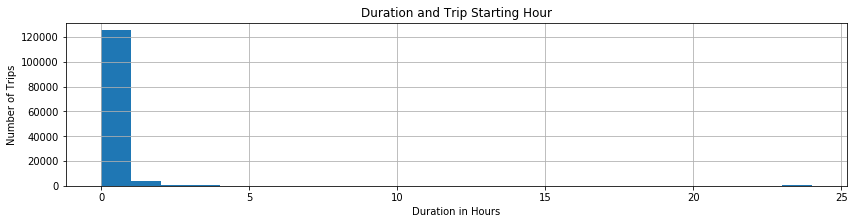

In [122]:
#create histogram, devide duration by 3600. to get decimal hours 
duration_histogram = (bike_share_trip.Duration/3600.).plot(
    title='Duration and Trip Starting Hour', kind='hist', bins=np.arange(0, 25, 1), grid=True, figsize=(14,3))
duration_histogram.set_xlabel('Duration in Hours')
duration_histogram.set_ylabel('Number of Trips')

In [123]:
#count total number of trips
trips_number = bike_share_trip.shape[0]
#count number of trips that lasted more than 5 hours
long_trips_number = bike_share_trip.query('Duration > 18000').shape[0]

print('Total Number of trips:', trips_number)
print('Number of trips lasting more than 5 hours:', long_trips_number)
print('Percentage: ', long_trips_number*100/trips_number, '%')

Total Number of trips: 132427
Number of trips lasting more than 5 hours: 1319
Percentage:  0.9960204490020917 %


Durations greater than 5 hours rarely happen. There are only 1319 such occurances out of 132427 (around 1%). Additionaly, accroding to the website, trip lengths are capped at 24 hours and  long trips may be the result of system or user error. Therefore, number of trips that last longer than 5 hours are probably even less then the numbers we saw. <p>Still it would be interesting to have a closer look:</p>

Text(0,0.5,'Number of Trips')

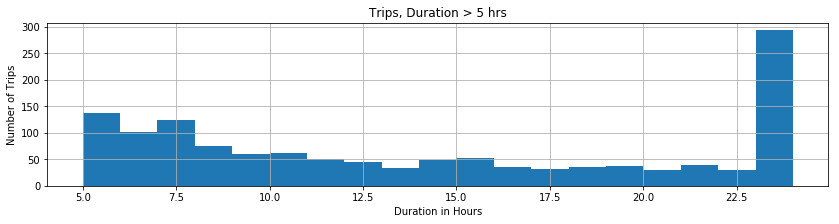

In [124]:
#trips that last more than 5 hours, duration given in hours
long_lasting_trips = bike_share_trip.query('Duration > 18000')['Duration']/3600.
#create histogram of long lasting trips
long_duration_histogram = (bike_share_trip.Duration/3600.).plot(
    kind='hist', bins=np.arange(5, 25, 1), title="Trips, Duration > 5 hrs", grid=True, figsize=(14,3))
long_duration_histogram.set_xlabel('Duration in Hours')
long_duration_histogram.set_ylabel('Number of Trips')

In the interval [5, 24] The most popular value is 24, which as mentioned above could be just a system or user error. So we could as well say that number of trips lasting longer than 5 hours gradually declines as duration increases.
<p>Since, most of trips last less than five hours, we should have a close look at that interval of duration.</p>

Text(0,0.5,'Number of Trips')

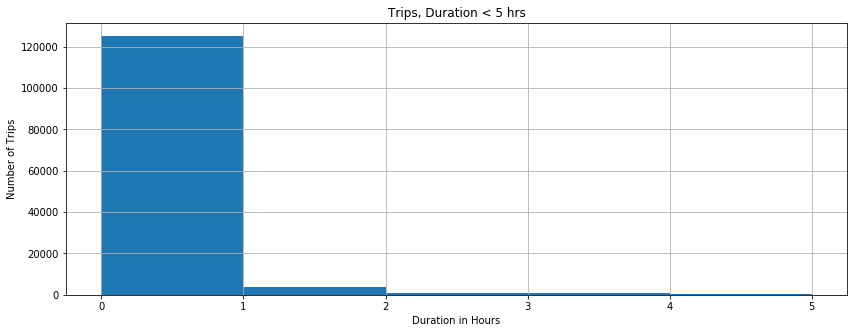

In [125]:
short_duration_histogram = (bike_share_trip.Duration/3600.).plot(
    kind='hist', bins = [0, 1, 2, 3, 4, 5], title="Trips, Duration < 5 hrs", grid=True, figsize=(14,5))
short_duration_histogram.set_xlabel('Duration in Hours')
short_duration_histogram.set_ylabel('Number of Trips')

As we see the most popular value is less than one hour, (followed by (1,2] duration interval) meaning most of the people use shared bikes for short distances.

<b>b)<b> Plot histogram for trip starting hour in the day attribute using descrete 1-hour intervals. What do you observer in the plot? Explain the local maxima and the trends you observe on the trip starting hour plot based on human behavior

Text(0,0.5,'Number of Bikes')

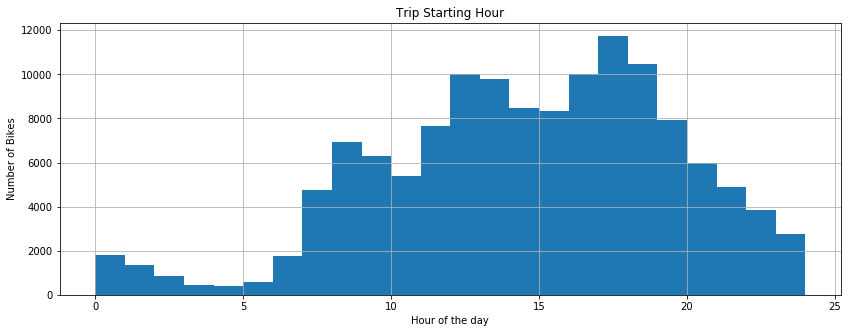

In [126]:
#plotting trip starting hours in histogram
trip_starting_hour_hist = trip_starting_hour.plot(
    title="Trip Starting Hour", kind='hist', bins=np.arange(0, 25, 1), grid=True, figsize=(14,5))
trip_starting_hour_hist.set_xlabel("Hour of the day")
trip_starting_hour_hist.set_ylabel("Number of Bikes")

According to the plot above, we have 3 clear local maxima:
<ol type="i">
    <li>From 08:00 to 9:00 - Most of the people go to work/school/university around this time. Therefore, it is not surprising to see this range as a local maxima</li>
    <li>From 12:00 to 13:00 - This time frame is associated with lunch break for most of the people. Probably, people take bikes to go to stores or cafes nearby, or run small errands during break.</li>
    <li>From 17:00 to 18:00 - Global maxima, People return from home/school/university</li>
</ol>

Additionally, we can observe that at night usage of bicycle declines (from 18:00 to 05:00), since almost everyone is at home sleeping. Once that are out gradually return as well, with only few people using bikes between 04:00 and 05:00. We should also note that global maxima is timeframe between 17:00 and 18:00 when most of the people go home. 


<h3 align="center"> B3.3 </h3> 
For each trip route category, calculate the proportion of trips by passholder type and present your results in a stacked bar chart with normalized height

In [127]:
#Group trips according to route category and passholder type and count how many trips are in each group
trip_grouped_by_route_pass = bike_share_trip.groupby(['Trip Route Category', 'Passholder Type']).size()
#Unstacked grouping
trip_grouped_by_route_pass.unstack()

Passholder Type,Flex Pass,Monthly Pass,Staff Annual,Walk-up
Trip Route Category,,,,
One Way,9034,77532,299,32777
Round Trip,483,3772,83,8447


<p>To calculate the proportion of trips by passholder type for each category, first we need to identify number of trips by passholder type for each category. That is why we group our data by these two attributes and then extract size of each group. In resulting data frame we can observer number of trips for each combination of passholder type and trip route category.</p>

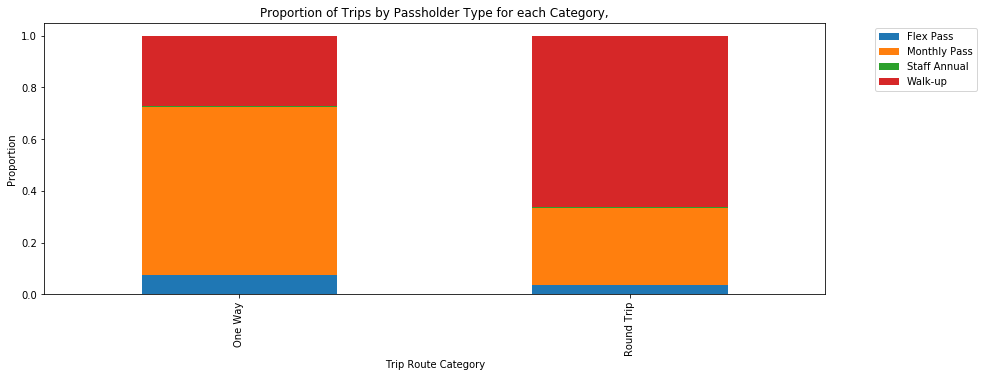

In [128]:
#calculate proportion of trips by passholder type for each category
bike_grouped_proportion = trip_grouped_by_route_pass.groupby(level=0).apply(lambda x:
                                                 x / float(x.sum()))

#creating bar chart with normalized heights
bike_grouped_proportion_plot = bike_grouped_proportion.unstack().plot(
    title='Proportion of Trips by Passholder Type for each Category,', kind='bar', stacked=True, figsize=(14,5))
#setting label on y axis
bike_grouped_proportion_plot.set_ylabel("Proportion")
#moving legend to the side
bike_grouped_proportion_plot.legend(bbox_to_anchor=(1.2, 1))

In order to calculate proportion of Trips by passholder type for each route category, we divided number of trips for each passholder type for that category by the total number of trips of the category. Afterwards presented results in bar charts with normalized heights.

<h3 align="center"> B3.4 </h3> 
Considering only trips that begin in the morning hours (before noon), plot in a single bar chart the proportion of trips by passholder type and trip route category. Explain any outliers you observe

<p>First step in order to plot proportion of early trips by passholder type and trip route category is extracting trips, 
that started before noon, from dataset. As soon as we have these "early" trips, we group them by passholder type and trip route
category. Afterwards we determine size of each group. Resulting data frame will give us information about size of each group (pair of route category and passholder type) 
considering early trips only. </p>

In [129]:
#Extracting trips, that started before noon
morning_trips = bike_share_trip.loc[bike_share_trip['Start Time'].dt.hour < 12]
#Size of morning trip groups by route category and passholder type
grouped_morning_trips = morning_trips.groupby(['Trip Route Category', 'Passholder Type']).size()
print(grouped_morning_trips)

Trip Route Category  Passholder Type
One Way              Flex Pass           2653
                     Monthly Pass       24570
                     Staff Annual          97
                     Walk-up             7510
Round Trip           Flex Pass            126
                     Monthly Pass        1056
                     Staff Annual          39
                     Walk-up             2129
dtype: int64


In [130]:
#compute proportion of trips of each groups with respect to total number of trips
grouped_morning_trips_proportion = grouped_morning_trips / morning_trips.shape[0]
#print resulting Serie
print(grouped_morning_trips_proportion)

Trip Route Category  Passholder Type
One Way              Flex Pass          0.069487
                     Monthly Pass       0.643531
                     Staff Annual       0.002541
                     Walk-up            0.196700
Round Trip           Flex Pass          0.003300
                     Monthly Pass       0.027658
                     Staff Annual       0.001021
                     Walk-up            0.055762
dtype: float64


<p>Above we calculated proportion of trips of every group with respect to total number of trips.</p>
<p>Now we will plot resulting Serie.</p>

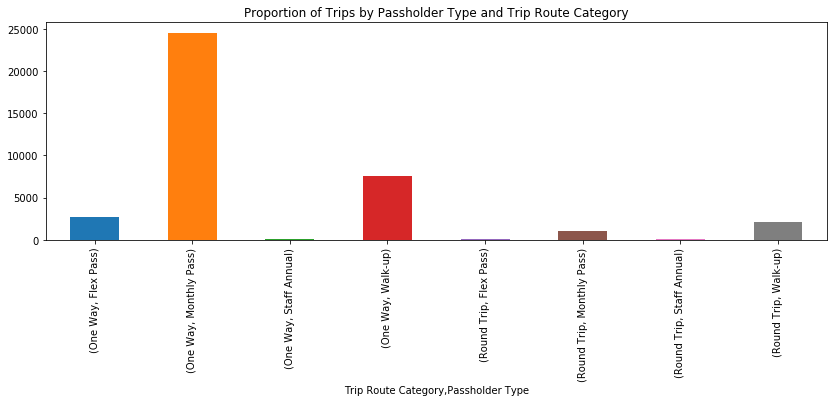

In [131]:
#plot bar chart for proportions 
grouped_morning_trips.plot(
    title='Proportion of Trips by Passholder Type and Trip Route Category', kind='bar', figsize=(14,4))
#moving legend to the side

As we see most of the "early" (before noon) trips are taken by people with monthly pass doing one way route. Number of trips for this group is considerebely higher than for any other. Additionally, number of round trips with Walk-up pass type (no pass) is surprisingly high compared to other groups that consider round trips as well. 

<h3 align="center"> B3.5 </h3> 
Separate the hours of the day into two intervals that have (approximately) the same number of bikes leaving the stations. For each of the two intervals calculate the proportion of trips by passholder type and trip route category. Present your results in a DataFrame which has a unique, non-composite index. Does the proportion of trips depend on whether it is the first or second hour interval? Would the company have any significant benefit by creating a more complex paying scheme where monthly pass users would pay less in the first interval and (equally) more on the second one? Assume that the number of trips per interval will not change if the scheme changes.

In [132]:
#Find Median For Start Hour of the trip
median = trip_starting_hour.median()
print("Median of Trip Starting Hours:", median)

Median of Trip Starting Hours: 14.966666666666667


But since we are searching for an hour of the day we need to choose between 14 and 15, since they are two closest Integers to real median. Let's check proportion of splits in case of 14 and 15:

In [133]:
#methos identifies if trip started before median value or not
#input parameters: median, index (index of trip in dataframe)
#output parameters: 'First Interval' if trip started before median time, 'Second Interval' otherwise
#method uses trip_starting_hour series, that contains decimal hours for each row(trip) of the database
def before_median(median, index):
    if (trip_starting_hour[index] < median):
        return 'First Interval'
    return 'Second Interval'

In [134]:
#group data according to median = 14 and 15, count size of each group
first_median_split = bike_share_trip.groupby(lambda x: before_median(14, x)).size()
second_median_split = bike_share_trip.groupby(lambda x: before_median(15, x)).size()

In [135]:
#determine split proportion
print("Median = 14, Split Proportion =", first_median_split['Second Interval']/first_median_split['First Interval'])
print("Median = 15, Split Proportion =", second_median_split['Second Interval']/second_median_split['First Interval'])

Median = 14, Split Proportion = 1.2838935550075021
Median = 15, Split Proportion = 0.9920724461091807


<p>Since proportion of split in case of Median = 15 is closer to one, we will consider 15 as our median and calculate 
    proportion of trips by passholder type and trip route category for each split. </p>

In [136]:
#group trips by interval of the day(before or after median), Passholder type and Route Category 
#And determine number of trips for each group (16 in total)
trips_grouped_interval = bike_share_trip.groupby([lambda x: before_median(15, x), 'Passholder Type', 'Trip Route Category']).size() 
trips_grouped_interval

                 Passholder Type  Trip Route Category
First Interval   Flex Pass        One Way                 4619
                                  Round Trip               268
                 Monthly Pass     One Way                39362
                                  Round Trip              2067
                 Staff Annual     One Way                  183
                                  Round Trip                59
                 Walk-up          One Way                15733
                                  Round Trip              4186
Second Interval  Flex Pass        One Way                 4415
                                  Round Trip               215
                 Monthly Pass     One Way                38170
                                  Round Trip              1705
                 Staff Annual     One Way                  116
                                  Round Trip                24
                 Walk-up          One Way                17044
 

<p>We grouped trip data according to the interval of the day(before or after median), Passholder Type and Trip Route Category.
Resulting Serie displays number of trips for each group</p>
<p> Now let's compute proportion of groups for each day interval

In [137]:
#determining proportion of trips grouped by passholder type and trip route category for each trip
trips_grouped_interval_proportion = trips_grouped_interval.groupby(level=0).apply(lambda x:
                                                 x / float(x.sum()))
#groups_proportion.set_index('Start Time')
trips_grouped_interval_proportion

                 Passholder Type  Trip Route Category
First Interval   Flex Pass        One Way                0.069483
                                  Round Trip             0.004031
                 Monthly Pass     One Way                0.592115
                                  Round Trip             0.031093
                 Staff Annual     One Way                0.002753
                                  Round Trip             0.000888
                 Walk-up          One Way                0.236668
                                  Round Trip             0.062969
Second Interval  Flex Pass        One Way                0.066945
                                  Round Trip             0.003260
                 Monthly Pass     One Way                0.578772
                                  Round Trip             0.025853
                 Staff Annual     One Way                0.001759
                                  Round Trip             0.000364
                 Walk-

<p>No we will convert the Serie into dataframe with unique, non-composite index</p>

In [138]:
#Convert Series into Data Frame
df_trips_grouped_interval_proportion = trips_grouped_interval_proportion.to_frame()
#Reset index
df_trips_grouped_interval_proportion.reset_index(inplace=True)
#print index of data frame
print("Index: ", df_trips_grouped_interval_proportion.index, '\n')
#display first few rows of grouped trips
df_trips_grouped_interval_proportion.head()

Index:  RangeIndex(start=0, stop=16, step=1) 



,level_0,Passholder Type,Trip Route Category,0
0,First Interval,Flex Pass,One Way,0.069483
1,First Interval,Flex Pass,Round Trip,0.004031
2,First Interval,Monthly Pass,One Way,0.592115
3,First Interval,Monthly Pass,Round Trip,0.031093
4,First Interval,Staff Annual,One Way,0.002753


As we see, index is now non-composite. We just need to rename some of the attributes:

In [139]:
#renaming attributes
df_trips_grouped_interval_proportion.rename(
    columns={'level_0': 'Interval', 0 : 'Proportion'}, inplace=True)
#displaying first few rows of grouped trips
df_trips_grouped_interval_proportion

,Interval,Passholder Type,Trip Route Category,Proportion
0,First Interval,Flex Pass,One Way,0.069483
1,First Interval,Flex Pass,Round Trip,0.004031
2,First Interval,Monthly Pass,One Way,0.592115
3,First Interval,Monthly Pass,Round Trip,0.031093
4,First Interval,Staff Annual,One Way,0.002753
5,First Interval,Staff Annual,Round Trip,0.000888
6,First Interval,Walk-up,One Way,0.236668
7,First Interval,Walk-up,Round Trip,0.062969
8,Second Interval,Flex Pass,One Way,0.066945
9,Second Interval,Flex Pass,Round Trip,0.003260


In [140]:
#check if index is unique
print("Index is unique:", df_trips_grouped_interval_proportion.index.is_unique)

Index is unique: True


Does the proportion of trips depend on whether it is the first or second hour interval? Would the company have any significant benefit by creating a more complex paying scheme where monthly pass users would pay less in the first interval and (equally) more on the second one? Assume that the number of trips per interval will not change if the scheme changes.

Proportion of trips in most cases does not really depend on hour interval, there are slightly more one way trips with flex pass than in the first interval compared to the second interval for example. Most of the differences however are small, therefore it is very unlikely for company to see any significant benefit by creating a more complex paying scheme.